In [28]:
import requests
import json
from Final_Authentication_keys import BLS_api_key


url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

headers = {
    'Content-type': 'application/json',
}


series = [
    'LAUDV534264400000003',  # Seattle-Bellevue-Everett, WA Metropolitan Division
    'LAUDV365158700000003',  # New York City Metropolitan Area
    'LAUDV310000100000003',  # Los Angeles Metropolitan Area
    'LAUDV169834600000003',  # Chicago Metropolitan Area
    'LAUDV191839100000003',  # Dallas-Fort Worth Metropolitan Area
    'LAUDV418842000000003',  # San Francisco Bay Area
]


start_year = '2018'
end_year = '2023'


data = {
    'seriesid': series,
    'startyear': start_year,
    'endyear': end_year,
    'registrationKey': BLS_api_key, 
}

response = requests.post(url, headers=headers, json=data)

json_data = response.json()

with open('bls_Unemployment_data.json', 'w') as f:
    json.dump(json_data, f)


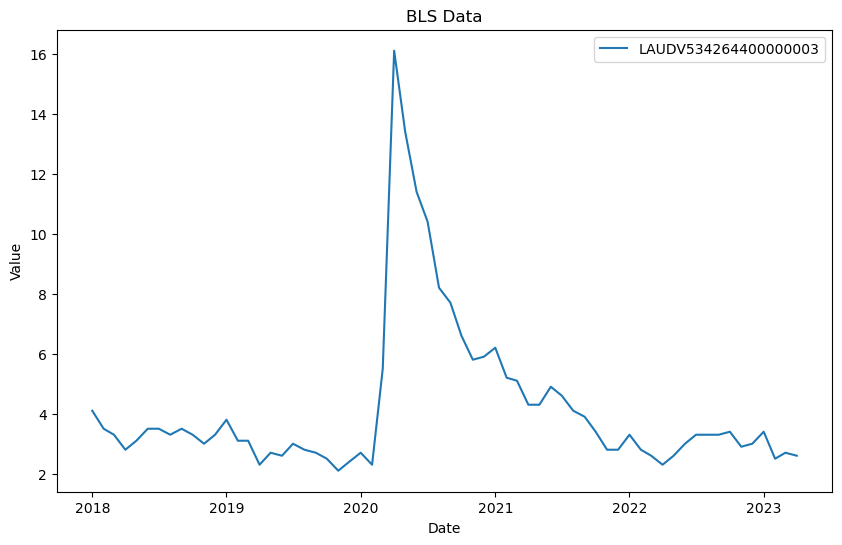

In [30]:
import pandas as pd
import json
import matplotlib.pyplot as plt


with open('bls_Unemployment_data.json') as f:
    data = json.load(f)

flattened_data = []
for series in data['Results']['series']:
    series_id = series['seriesID']
    for datapoint in series['data']:
        flattened_data.append({
            'seriesID': series_id,
            'year': datapoint['year'],
            'period': datapoint['period'],
            'value': float(datapoint['value']),
        })
df = pd.DataFrame(flattened_data)


df['date'] = pd.to_datetime(df['year'] + df['period'].str[1:], format='%Y%m')


plt.figure(figsize=(10,6))
for series_id, group in df.groupby('seriesID'):
    plt.plot(group['date'], group['value'], label=series_id)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('BLS Data')
plt.show()


employment data

In [38]:
import requests
import json


url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
headers = {'Content-type': 'application/json'}


series_ids = [
    'LAUDV534264400000006',  # Seattle-Bellevue-Everett, WA Metropolitan Division
    'LAUDV365158700000006',  # New York City Metropolitan Area
    'LAUDV310000100000006',  # Los Angeles Metropolitan Area
    'LAUDV169834600000006',  # Chicago Metropolitan Area
    'LAUDV191839100000006',  # Dallas-Fort Worth Metropolitan Area
    'LAUDV418842000000006',  # San Francisco Bay Area
   
]
series = [
    
]


start_year = '2018'
end_year = '2023'


data = {
    'seriesid': series_ids,
    'startyear': start_year,
    'endyear': end_year,
    'registrationKey': BLS_api_key}


response = requests.post(url, headers=headers, json=data)

json_data = response.json()


with open('bls_employment_data.json', 'w') as f:
    json.dump(json_data, f)


In [20]:
import requests
import time
import json
from datetime import datetime

# List of job-related subreddits
subreddits = ['jobs', 'careerguidance', 'careeradvice']

# Initialize a dictionary to store data by year
data_by_year = {year: 0 for year in range(2018, 2024)}

# Define start and end times for each year
start_times = [int(datetime(year, 1, 1).timestamp()) for year in range(2018, 2024)]
end_times = start_times[1:] + [int(datetime(2024, 1, 1).timestamp())]

# Loop over the subreddits
for subreddit in subreddits:
    print(f'Processing subreddit: {subreddit}')

    # Loop over each year
    for start_time, end_time in zip(start_times, end_times):
        year = datetime.utcfromtimestamp(start_time).year
        print(f'\tProcessing year: {year}')

        # Query Pushshift API
        response = requests.get(
            'https://api.pushshift.io/reddit/search/submission/',
            params={
                'subreddit': subreddit,
                'after': start_time,
                'before': end_time,
                'size': 0,  # We only care about the total count
                'aggs': 'created_utc'  # Aggregate by timestamp
            }
        )

        # Check for errors
        response.raise_for_status()

        # Increment the count for the year
        data_by_year[year] += response.json()['aggs']['created_utc']['doc_count']

        # Sleep to avoid hitting rate limit
        time.sleep(1)

# Save the data to a JSON file
with open('reddit_job_discussions.json', 'w') as f:
    json.dump(data_by_year, f)


Processing subreddit: jobs
	Processing year: 2018


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [21]:
print(response.text)



Check back in the next few weeks for updates.

- Pushshift team (May 19, 2023)



In [22]:
response = requests.get(
    'https://api.pushshift.io/reddit/search/submission/',
    params={
        'subreddit': subreddit,
        'after': start_time,
        'before': end_time
    }
)


In [23]:
data_by_year[year] += response.json()['metadata']['total_results']



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

wordcloud


In [24]:
import requests
import json

def get_reddit_data(subreddit, num_samples):
    base_url = "https://api.pushshift.io/reddit/search/comment/"
    data = []
    for i in range(num_samples):
        res = requests.get(base_url, params={"subreddit": subreddit, "size": 500, "after": 500*i})
        if res.status_code == 200:
            data.extend(res.json()["data"])
    return data

# call the function
data = get_reddit_data("jobs", 5)

# convert data to json and save
with open("reddit_data.json", "w") as f:
    json.dump(data, f)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [25]:
res = requests.get("https://api.pushshift.io/reddit/search/comment/", params={"subreddit": subreddit, "size": 500, "after": 500})
print(res.status_code)
print(res.text)

200
Check back in the next few weeks for updates.

- Pushshift team (May 19, 2023)



In [15]:
!pip install wordcloud


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/loricai/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

url = "https://socialgrep.p.rapidapi.com/search/posts"

querystring = {"query":"/r/jobs,employment"}

headers = {
    "X-RapidAPI-Key": "47cb169257msh251d96938069159p1acac1jsn2fdb8a62a112",
    "X-RapidAPI-Host": "socialgrep.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()

# Collect all words in 'title' of each post
words = []
for post in data['posts']:
    words.extend(word_tokenize(post['title']))

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# Count frequency of each word
word_counter = Counter(words)

# Generate a word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_counter)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Generate a bar chart for the 10 most common words
common_words = word_counter.most_common(10)
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

plt.figure(figsize=(15,8))
plt.bar(words, counts)
plt.title('Most common words in job discussions')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


It look like the pushshift api cannot be used for weeks, so I am thinking to change my questions a little bit.

for now,
1. Overall statistics and comparison of employment and unemployment in these five regions
2. By analyzing the data of specific industries, it finds out what are the most concentrated industries in the five regions.
3. Then compare the number of jobs and unemployment rate in these industries during the five years.

to deal with these questions, I can just use BLS api to finish them.
and the QCEW provided the xlsx to view the industries data. so I just need to turn them to json files to import.

In [41]:
!pip install pandas
!pip install openpyxl

In [48]:
import pandas as pd

# Load the csv file
df = pd.read_csv('/Users/loricai/Downloads/Chrome download/2021.annual.by_area/2021.annual C4266 Seattle-Tacoma-Bellevue, WA MSA.csv')


# Convert the DataFrame to JSON
json_data = df.to_json(orient='records')  # 'records' format creates a list of records in the JSON file

# Write the JSON data to a file
with open('2021.annual C4266 Seattle-Tacoma-Bellevue, WA MSA.json', 'w') as json_file:
    json_file.write(json_data)



In [54]:
import pandas as pd

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='annual_avg_emplvl', ascending=False)
top_industries = df_sorted['industry_title'].head(5)
print(top_industries)


KeyError: 'annual_avg_emplvl'